# Telco Customer Churn - Data Cleansing and Feature Engineering
From the course instructions: in some process models Data Cleansing is a separate task, it is closely tied to Feature Creation but also draws findings from the Initial Data Exploration task. The actual data transformations are implemented in the Feature Creation asset deliverable; therefore, Data Cleansing is part of the Feature Creation task in this process model.

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
df = pd.read_csv('../dataset/dataset_etl.csv')

## Data Cleansing - Checks

- Data types: are data types of columns matching their content? E.g. is age stored as integer and not as string?

- Ranges: does the value distribution of values in a column make sense? Use stats (e.g. min, max, mean, standard deviation) and visualizations (e.g. box-plot, histogram) for help

- Emptiness: are all values non-null where mandatory? E.g. client IDs

- Uniqueness: are duplicates present where undesired? E.g. client IDs

- Set memberships: are only allowed values chosen for categorical or ordinal fields? E.g. Female, Male, Unknown

- Foreign key set memberships: are only allowed values chosen as field? E.g. ZIP code

- Regular expressions: some files need to stick to a pattern expressed by a regular expression. E.g. a lower-case character followed by 6 digits

- Cross-field validation: some fields can impact validity of other fields. E.g. a male person can’t be pregnant 

### Data types
The numerical variables are correctly stored in numerical objects. During the feature creation step string variables containing two categories will be converted to zero or one, and string objects containing more than two categories will be one hot encoded.

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Ranges

In [4]:
# From the data exploration step we know that some rows had empty strings in the TotalCharges column. 
# Those rows will be removed from the range analysis to get a better idea of the distribution of TotalCharges.
# The SeniorCitizen column is not considered in the analysis because it's a boolean encoded as an integer
empty_total_charges = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
df.drop(empty_total_charges).drop('SeniorCitizen', axis=1).describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


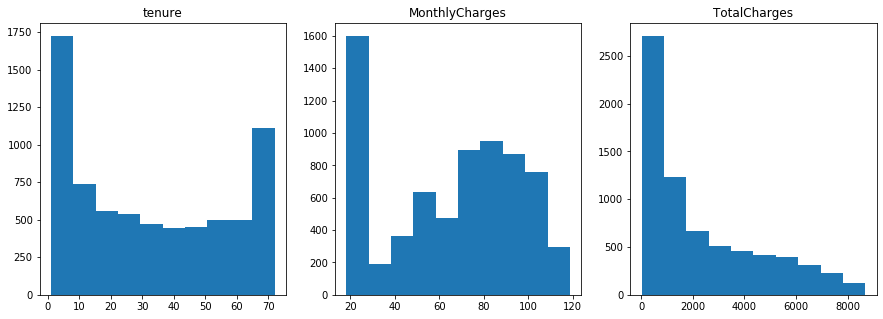

In [5]:
column_names = list(df.dtypes.index)
numeric_variables = [x for x in column_names if str(df[x].dtype) == 'float64' or str(df[x].dtype) == 'int64']
numeric_variables.remove('SeniorCitizen')

f, ax = plt.subplots(1, 3, figsize=(15,5))
# subplots containing histograms of the numeric variables
for idx, var in enumerate(numeric_variables):
    x = idx % 3
    ax[x].hist(df.drop(empty_total_charges)[var])
    ax[x].title.set_text(var)
   
plt.subplots_adjust(hspace=0.5)
plt.show()

### Emptyness
Check if there are any empty strings in the customer ID column.

In [6]:
if len(df.index[df['customerID'].str.strip() =='']) == 0:
    print('There are no empty strings in the customer ID column.')
else:
    print('There are empty strings in the customer ID column.')

There are no empty strings in the customer ID column.


### Uniqueness
Check if there are more than one row for each customer ID.

In [7]:
if len(set(df['customerID'])) == df.shape[0]:
    print('There is only one record for each customer ID.')
else:
    print('There is more one record for each customer ID.') 

There is only one record for each customer ID.


### Set memberships
From the data exploration step, we observe that there are only allowed values chosen for categorical variables.

In [8]:
non_numeric_columns = [var for var in column_names if df[var].dtype == 'object' or df[var].dtype == 'bool' ]
non_numeric_columns.append('SeniorCitizen')
# print counts of non_numeric_features, except the customerID variable
for var in non_numeric_columns[1:]:
    print('\n<---- ')
    print(df[var].value_counts())
    print('---->\n')


<---- 
Male      3555
Female    3488
Name: gender, dtype: int64
---->


<---- 
No     3641
Yes    3402
Name: Partner, dtype: int64
---->


<---- 
No     4933
Yes    2110
Name: Dependents, dtype: int64
---->


<---- 
Yes    6361
No      682
Name: PhoneService, dtype: int64
---->


<---- 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---->


<---- 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
---->


<---- 
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
---->


<---- 
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
---->


<---- 
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
---->


<---- 
No                     3473
Yes                    2044
No internet servic

### Additional steps
Foreign key set memberships, regular expressions and cross-field validation do not apply to this dataset.

## Feature Creation and Feature Engineering 
From the course instructions: Feature Creation and Feature Engineering is one of the most important tasks in machine learning since it hugely impacts model performance.

### Feature Creation

#### One-hot-encoding
String variables containing two categories will be converted to zero or one.

In [9]:
two_categories = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

In [10]:
# gender
d = {'Male': 1, 'Female': 0}
df['gender']=df['gender'].map(d).values

# Partner, Dependents, PhoneService, PaperlessBilling, Churn
d = {'Yes': 1, 'No': 0}
df['Partner']=df['Partner'].map(d).values
df['Dependents']=df['Dependents'].map(d).values
df['PhoneService']=df['PhoneService'].map(d).values
df['PaperlessBilling']=df['PaperlessBilling'].map(d).values
df['Churn']=df['Churn'].map(d).values

String objects containing more than two categories will be one hot encoded.

In [11]:
greater_two_categories = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                          'Contract', 'PaymentMethod']

In [12]:
for var in greater_two_categories:
    dfDummies = pd.get_dummies(df[var], prefix = var)
    df = pd.concat([df, dfDummies], axis=1, sort=False)
df = df.drop(greater_two_categories, axis = 1)

In [13]:
df.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes             

### Feature Transformation

#### Filtering
Rows that cointained empty strings in the TotalCharges column will be removed from the dataset. A possibility in the future would be to input a value based on the TotalCharges distribution or the correlation with tenure.

In [14]:
df = df.drop(empty_total_charges)

####  Scaling / Normalizing / Centering
Numeric features will be normalized and centered.

In [15]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df[numeric_variables]))
df_scaled.columns = ['tenure_scaled','MonthlyCharges_scaled','TotalCharges_scaled']
# fix issue when concatenating dataframes after filtering, which would create NaN values due to index mismatch
df_scaled.index = df.index 
df = pd.concat([df, df_scaled], axis=1)
df.isnull().sum().sum()

0

In [16]:
# the customerID variable is not relevant for modelling and it not be stored in the modelling dataset
df.drop('customerID',axis=1).to_csv('../dataset/dataset_model.csv', index=False)